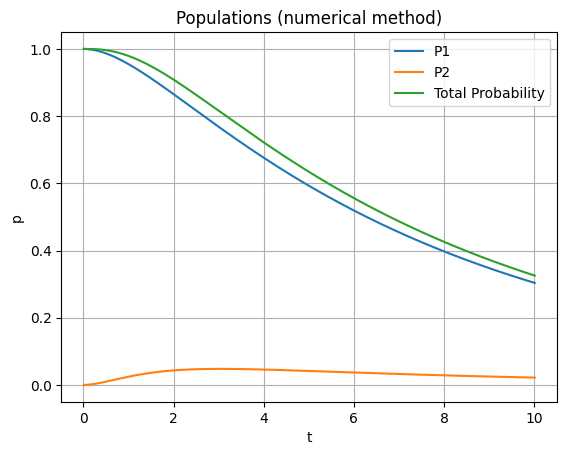

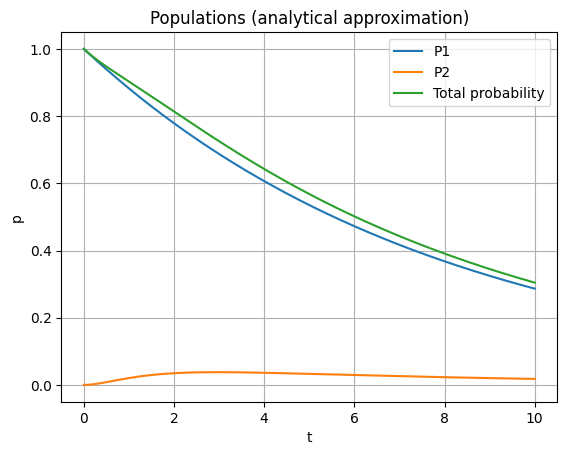

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode

gamma = 1
omega = gamma / 2


def analyticalP1(t):
    return np.exp(-omega**2 * t/(2*gamma) )

def analyticalP2(t):
    return (omega**2/(4*gamma**2) )  *  (np.exp(-gamma*t) - np.exp(-omega**2 * t/(4*gamma**2) ))**2


def diff_eq(t, y):
    c1, c2 = y
    dc1dt = (-1j * omega / 2) * c2
    dc2dt = (-1j * omega / 2) * c1 - gamma * c2
    return [dc1dt, dc2dt]


t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

y0 = [1.0 + 0j, 0.0 + 0j]

solver = complex_ode(diff_eq).set_integrator('vode', method='bdf')
solver.set_initial_value(y0, t[0])

x = []
times = []
while solver.successful() and solver.t <= t[-1]:
    solver.integrate(solver.t + dt)
    x.append(solver.y)
    times.append(solver.t)

x = np.array(x)

times = np.array(times)

prob_total = np.abs(x[:, 0])**2 + np.abs(x[:, 1])**2

fig, axe = plt.subplots()
axe.plot(times, abs(x[:, 0])**2, label="P1")
axe.plot(times, abs(x[:, 1])**2, label="P2")
axe.plot(times, prob_total, label="Total Probability")
axe.set_title("Populations (numerical method)")
axe.set_xlabel("t")
axe.set_ylabel("p")
axe.legend()
axe.grid()


analytical_sols1  = []
analytical_sols2  = []
prob_total_1 = []
for n in t: 
    analytical_sols1.append(analyticalP1(n))
    analytical_sols2.append(analyticalP2(n))
    prob_total_1.append(analyticalP1(n) + analyticalP2(n))


fig1, axe1 = plt.subplots()
axe1.plot(t, analytical_sols1, label="P1")
axe1.plot(t,analytical_sols2, label="P2")
axe1.plot(t,prob_total_1, label="Total probability")

axe1.set_title("Populations (analytical approximation)")
axe1.set_xlabel("t")
axe1.set_ylabel("p")
axe1.legend()
axe1.grid()
plt.show()

